# Exploratory Data Analysis of ORIGA RoI and DRISHTI RoI datasets

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

## Load dataset

In [2]:
def get_paths(directory):
    return [os.path.join(directory, name) for name in os.listdir(directory)]


image_paths = sorted([
    *get_paths('../data/ORIGA/ROI/TrainImages'),
    *get_paths('../data/ORIGA/ROI/TestImages'),
    *get_paths('../data/DRISHTI/ROI/TrainImages'),
    *get_paths('../data/DRISHTI/ROI/TestImages'),
])

mask_paths = sorted([
    *get_paths('../data/ORIGA/ROI/TrainMasks'),
    *get_paths('../data/ORIGA/ROI/TestMasks'),
    *get_paths('../data/DRISHTI/ROI/TrainMasks'),
    *get_paths('../data/DRISHTI/ROI/TestMasks'),
])

df = []
for image_path, mask_path in zip(image_paths, mask_paths):
    image = cv.imread(image_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    mask = cv.imread(mask_path, cv.IMREAD_GRAYSCALE)

    bg_count = (mask == 0).sum()
    od_count = (mask == 1).sum()
    oc_count = (mask == 2).sum()

    bg_percent = bg_count / mask.size
    od_percent = od_count / mask.size
    oc_percent = oc_count / mask.size

    df.append({
        'image_path': image_path,
        'mask_path': mask_path,
        'image_shape': image.shape,
        'mask_shape': mask.shape,
        'image_dtype': image.dtype,
        'mask_dtype': mask.dtype,
        'image_min': image.min(),
        'mask_min': mask.min(),
        'image_max': image.max(),
        'mask_max': mask.max(),
        'image_mean': image.mean(),
        'mask_mean': mask.mean(),
        'image_std': image.std(),
        'mask_std': mask.std(),
        'bg_count': bg_count,
        'od_count': od_count,
        'oc_count': oc_count,
        'bg_percent': bg_percent,
        'od_percent': od_percent,
        'oc_percent': oc_percent,
    })

df = pd.DataFrame(df)
df.head(10)

,image_path,mask_path,image_shape,mask_shape,image_dtype,mask_dtype,image_min,mask_min,image_max,mask_max,image_mean,mask_mean,image_std,mask_std,bg_count,od_count,oc_count,bg_percent,od_percent,oc_percent
0,../data/DRISHTI/ROI/TestImages\drishtiGS_001.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_001.png,"(512, 512, 3)","(512, 512)",uint8,uint8,4,0,214,2,61.099663,0.628590,49.652293,0.855730,162743,34021,65380,0.620815,0.129780,0.249405
1,../data/DRISHTI/ROI/TestImages\drishtiGS_003.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_003.png,"(512, 512, 3)","(512, 512)",uint8,uint8,5,0,163,2,51.262630,0.391212,36.144369,0.724906,197250,27234,37660,0.752449,0.103889,0.143661
2,../data/DRISHTI/ROI/TestImages\drishtiGS_005.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_005.png,"(512, 512, 3)","(512, 512)",uint8,uint8,10,0,227,2,101.735146,0.882866,58.702859,0.907367,125065,42720,94359,0.477085,0.162964,0.359951
3,../data/DRISHTI/ROI/TestImages\drishtiGS_006.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_006.png,"(512, 512, 3)","(512, 512)",uint8,uint8,2,0,198,2,59.331543,0.457584,46.913941,0.722478,178075,48185,35884,0.679302,0.183811,0.136887
4,../data/DRISHTI/ROI/TestImages\drishtiGS_007.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_007.png,"(512, 512, 3)","(512, 512)",uint8,uint8,8,0,255,2,120.730303,0.758080,76.372615,0.874961,139723,46116,76305,0.533001,0.175919,0.291080
5,../data/DRISHTI/ROI/TestImages\drishtiGS_009.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_009.png,"(512, 512, 3)","(512, 512)",uint8,uint8,8,0,187,2,60.000935,0.278851,37.159599,0.571933,205562,40065,16517,0.784157,0.152836,0.063007
6,../data/DRISHTI/ROI/TestImages\drishtiGS_011.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_011.png,"(512, 512, 3)","(512, 512)",uint8,uint8,3,0,214,2,78.328691,0.375679,54.090300,0.734402,203613,18580,39951,0.776722,0.070877,0.152401
7,../data/DRISHTI/ROI/TestImages\drishtiGS_013.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_013.png,"(512, 512, 3)","(512, 512)",uint8,uint8,1,0,167,2,41.797484,0.220692,36.309792,0.562199,223176,20083,18885,0.851349,0.076611,0.072041
8,../data/DRISHTI/ROI/TestImages\drishtiGS_014.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_014.png,"(512, 512, 3)","(512, 512)",uint8,uint8,9,0,217,2,67.308796,0.406887,44.170387,0.758947,199347,18931,43866,0.760448,0.072216,0.167336
9,../data/DRISHTI/ROI/TestImages\drishtiGS_019.png,../data/DRISHTI/ROI/TestMasks\drishtiGS_019.png,"(512, 512, 3)","(512, 512)",uint8,uint8,10,0,255,2,101.511159,0.607487,64.187758,0.858170,168170,28699,65275,0.641518,0.109478,0.249004


## Image Resolution Analysis

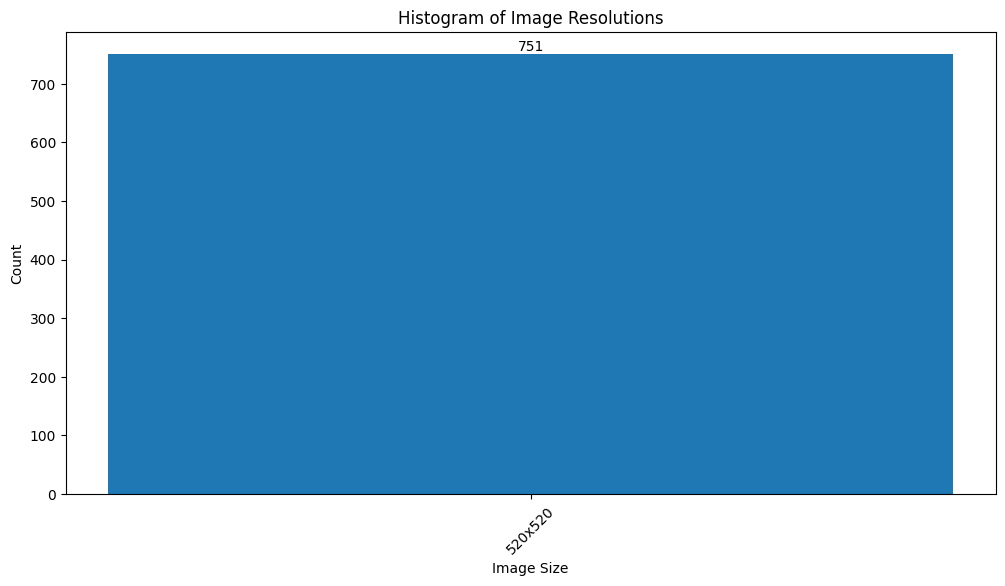

In [3]:
# Get the unique image sizes and their counts
shapes = df['image_shape'].tolist()
# Round shapes to nearest multiple of k
k = 20
shapes = [(round(s[0] / k) * k, round(s[1] / k) * k) for s in shapes]
# Get unique shapes and their counts
shapes, counts = np.unique(np.array(shapes), axis=0, return_counts=True)

# Plot the histogram
size_labels = [f'{s[0]}x{s[1]}' for s in shapes]
plt.figure(figsize=(12, 6))
bars = plt.bar(size_labels, counts)
plt.xlabel('Image Size')
plt.ylabel('Count')
plt.title('Histogram of Image Resolutions')
plt.xticks(rotation=45)

# Add count labels to each bar
for bar, value in zip(bars, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, value, ha='center', va='bottom')
plt.show()

## Class Imbalance Analysis

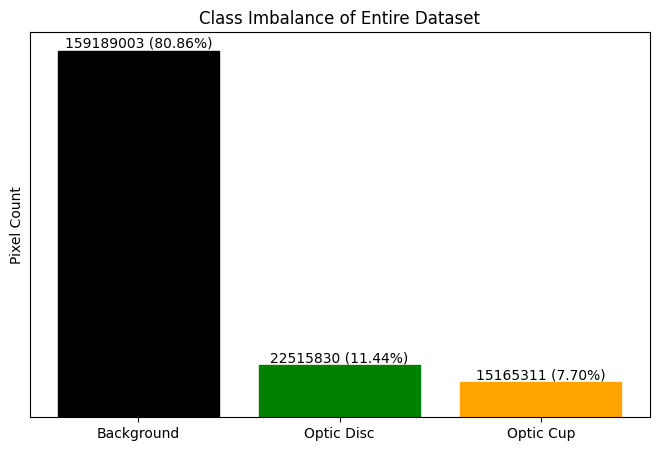

In [4]:
CLASS_NAMES = ['Background', 'Optic Disc', 'Optic Cup']
CLASS_COLORS = ['black', 'green', 'orange']

dataset_stats = {
    'Background': df['bg_count'].sum(),
    'Optic Disc': df['od_count'].sum(),
    'Optic Cup': df['oc_count'].sum(),
}

# Plot the histogram
plt.figure(figsize=(8, 5))
bars = plt.bar(dataset_stats.keys(), dataset_stats.values())
plt.ylabel('Pixel Count')
plt.title('Class Imbalance of Entire Dataset')
plt.xticks(list(dataset_stats.keys()), CLASS_NAMES)
plt.yticks([])

# Add count labels to each bar with percentage
total = sum(dataset_stats.values())
for bar, value in zip(bars, dataset_stats.values()):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             f'{value} ({value / total * 100:.2f}%)',
             ha='center', va='bottom')

# Add color to each bar
for bar, color in zip(bars, CLASS_COLORS):
    bar.set_color(color)
plt.show()
